                                                  DIABETES AND HEART DISEASE PREDICTION                                             
INTRODUCTION: In recent years, the rise in lifestyle-related diseases such as heart disease and diabetes has become a major global health concern. These conditions, if not detected and managed early, can lead to serious health complications and even death. Hence, timely and accurate prediction of these diseases is crucial for effective prevention and treatment.

--> With the rapid advancement of machine learning (ML) techniques, it has become possible to analyze large medical datasets to uncover hidden patterns and make accurate predictions. This project aims to apply ML algorithms to predict whether an individual is at risk of diabetes or heart disease using various medical parameters.

SCOPE: To build and evaluate machine learning models that can accurately predict the presence of heart disease and diabetes based on medical attributes, helping in early detection and preventive healthcare.

ATTRIBUTE INFORMATION:
-->The diabete dataset comprises 768 rows and 9 columns (features).
-->the heart dataset comprises 270 and 14 columns (features)
-->Each row represents a body health. 
-->The Result columns are the 'Outcome' and 'Heart disease'. It signifies whether a patient is diabetic, heart disease (1) or a non diabetic, no disease (0).

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [3]:
# Import the diabetes data
import pandas as pd
diabetes_data=pd.read_csv('diabetes.csv')
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Import the Heart data
heart_data=pd.read_csv("heart.csv")
# Covert the 'heart disease'(1,2) into binary (0,1)
heart_data.replace({'heart disease': {2: 0}}, inplace=True)
heart_data.head(5)

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [31]:
# Diabetes Data shape
diabetes_data.shape

(768, 9)

In the Diabetes dataset has 768 rows and 9 columns.

In [33]:
# Heart data shape
heart_data.shape

(270, 14)

In the Heart dataset has 270 rows and 14 columns.

In [35]:
# Diabetes dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# Heart dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  
 6   resting ecg           270 non-null    int64  
 7   max heart rate        270 non-null    int64  
 8   exercise angina       270 non-null    int64  
 9   ST depression         270 non-null    float64
 10  ST slope              270 non-null    int64  
 11  flouroscopy coloured  270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart disease         270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [39]:
# Diabetes numerical features description
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Observation: The diabetes dataset shows the statistical measurements of the numerical data_types

In [41]:
# Heart numerical features description
heart_data.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
Observation: The heart dataset shows the statistical measurements of the numerical data_types.

In [44]:
# Check the null values in Diabetes dataset
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observation: There is no null values in the diabetes dataset

In [64]:
# Check the null values in Heart dataset
heart_data.isna().sum()

age                     0
sex                     0
pain type               0
BP                      0
cholestrol              0
fbs                     0
resting ecg             0
max heart rate          0
exercise angina         0
ST depression           0
ST slope                0
flouroscopy coloured    0
thal                    0
heart disease           0
dtype: int64

Observation: There is no null values in the heart dataset

In [78]:
# Check the duplicate values in Diabetes data
diabetes_data.duplicated().sum()

0

In [80]:
# Check the duplicate values in Heart data
heart_data.duplicated().sum()

0

In [56]:
# Check the unique values in Diabetes data
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [58]:
# Check the unique values in Heart data
heart_data.nunique()

age                      41
sex                       2
pain type                 4
BP                       47
cholestrol              144
fbs                       2
resting ecg               3
max heart rate           90
exercise angina           2
ST depression            39
ST slope                  3
flouroscopy coloured      4
thal                      3
heart disease             2
dtype: int64

In [86]:
# Unique values in each category for Diabeets data
for col in diabetes_data.columns:
    unique_values=diabetes_data[col].unique()
    print(f'{col}: ',unique_values)

Pregnancies:  [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose:  [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure:  [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness:  [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


In [77]:
# Unique values in each category of Heart dataset
for col in heart_data.columns:
    unique_values=heart_data[col].unique()
    print(f'{col}: ',unique_values)

age:  [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
sex:  [1 0]
pain type:  [4 3 2 1]
BP:  [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
cholestrol:  [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
fbs:  [0 1]
resting ecg:  [2 0 1]
max h

In [90]:
# Check the number of numerical and categorical values in the Diabetes dataset.
Numerical_features=[feature for feature in diabetes_data.columns if diabetes_data[feature].dtype!='O']
Categorical_features=[feature for feature in diabetes_data.columns if diabetes_data[feature].dtype=='O']
print("{} Numerical_features: {}".format(len(Numerical_features),Numerical_features))
print('{} Categorical_features: {}'.format(len(Categorical_features),Categorical_features))

9 Numerical_features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
0 Categorical_features: []


Observation: In the Diabetes dataset, there is no categorical columns and all 9 columns are numerical.

In [92]:
# Check the number of numerical and categorical values in the Heart dataset.
Numerical_features=[feature for feature in heart_data.columns if heart_data[feature].dtype!='O']
Categorical_features=[feature for feature in heart_data.columns if heart_data[feature].dtype=='O']
print("{} Numerical_features: {}".format(len(Numerical_features),Numerical_features))
print('{} Categorical_features: {}'.format(len(Categorical_features),Categorical_features))

14 Numerical_features: ['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg', 'max heart rate', 'exercise angina', 'ST depression', 'ST slope', 'flouroscopy coloured', 'thal', 'heart disease']
0 Categorical_features: []


Observation: In the Diabetes dataset, there is no categorical columns and all 14 columns are numerical.

In [3]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

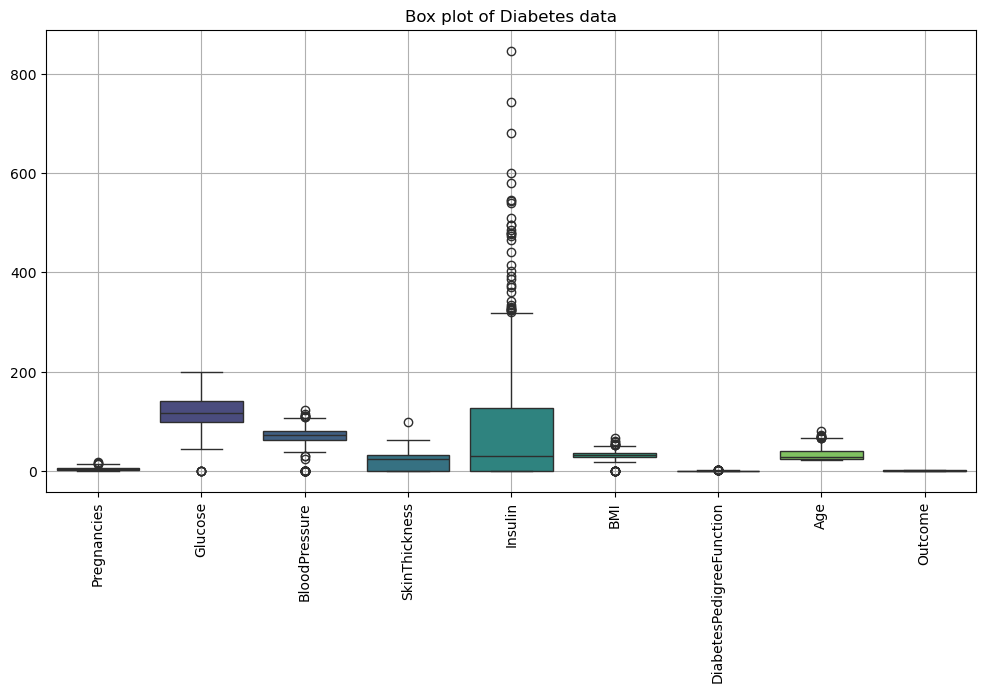

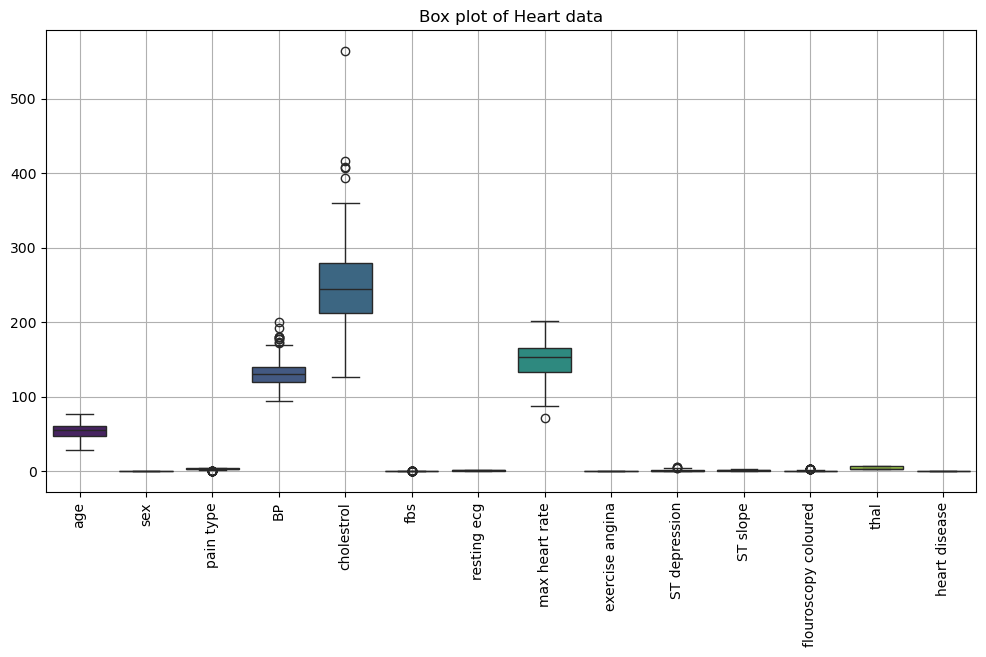

In [35]:
# Outlier Detection using Box Plot
# Box Plot of diabetes data with numerical features
plt.figure(figsize=(12,6))
sns.boxplot(diabetes_data.select_dtypes(include=np.number),palette="viridis")
plt.xticks(rotation=90)
plt.title("Box plot of Diabetes data")
plt.grid()
plt.show()

# Box Plot of heart data with numerical features
plt.figure(figsize=(12,6))
sns.boxplot(heart_data.select_dtypes(include=np.number),palette="viridis")
plt.xticks(rotation=90)
plt.title("Box plot of Heart data")
plt.grid()
plt.show()

Observation:  The boxplot provides a visual representation of the spread in the feature values, making it easier to detect extreme values.
->The box represents the interquartile range (IQR), which is the middle 50% of the data.
->The line inside the box is the median (middle value).
->The whiskers extend to 1.5 times the IQR from the quartiles or to the maximum/minimum data points (whichever is closer).
->Any points outside the whiskers are plotted as outliers.In this, one outlier detected in the dataset
Diabetes Dataset --> In this, outliers detected in all columns.
Heart Dataset    --> In this, outliers detected in all columns.
The two dataset are related to health care. So can't reomve the outliers because the every report is important to health. Use Capping (in data preprocessing) means limiting extreme values (outliers) in a dataset by setting them to a maximum or minimum threshold, instead of removing them.

In [17]:
# Capping process for Diabetes Data
import numpy as np

def cap_outliers(diabetes_data, column):
    Q1 = diabetes_data[column].quantile(0.25)
    Q3 = diabetes_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    diabetes_data[column] = np.where(diabetes_data[column] < lower, lower,
                            np.where(diabetes_data[column] > upper, upper, diabetes_data[column]))
    return diabetes_data
# Apply outlier capping to all numeric columns
diabetes_capped = diabetes_data.copy()

for col in diabetes_data.select_dtypes(include='number').columns:
    diabetes_outlier = cap_outliers(diabetes_data, col)
# Return summary statistics before and after capping for comparison
summary_before = diabetes_data.describe()
summary_after = diabetes_outlier.describe()

summary_before, summary_after

(       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.837240  121.136230      70.684896      20.511719   73.652669   
 std       3.344157   31.187468      14.197239      15.844744   93.576029   
 min       0.000000   37.125000      35.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      13.500000  199.000000     107.000000      80.000000  318.125000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  768.000000                768.000000  768.000000  768.000000  
 mean    32.125065                  0.458914   33.199870    0.348958  
 std      7.049584                  0.285596   11.628404    0.476951  
 min     13.350000   

Before capping:
count    768.000000
mean      73.652669
std       93.576029
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      318.125000
Name: Insulin, dtype: float64

After capping:
count    768.000000
mean      73.652669
std       93.576029
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      318.125000
Name: Insulin, dtype: float64


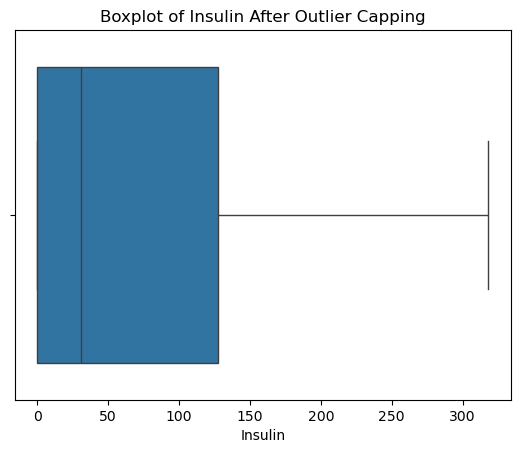

In [19]:
# Check the capping and outlier using boxplot
print("Before capping:")
print(diabetes_data['Insulin'].describe())

print("\nAfter capping:")
print(diabetes_data['Insulin'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=diabetes_data['Insulin'])
plt.title("Boxplot of Insulin After Outlier Capping")
plt.show()


Observation: Check the single feature ('Insulin') outliers after capping, the outliers are minimized by using the capping.

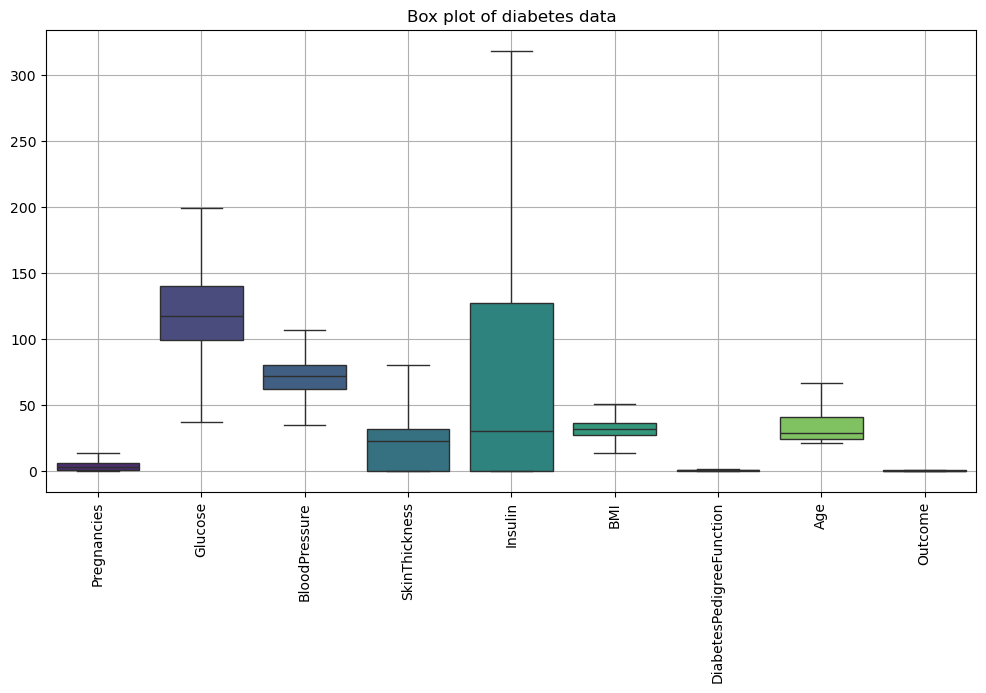

In [21]:
# Outlier Detection using Box Plot after Capping
# Box Plot of D data with numerical features
plt.figure(figsize=(12,6))
sns.boxplot(diabetes_data.select_dtypes(include=np.number),palette="viridis")
plt.xticks(rotation=90)
plt.title("Box plot of diabetes data")
plt.grid()
plt.show()

Observation: Diabetes dataset..
->'Insulin' has a wider ranges, as seen by the longer whiskers, indicating more variability in their data.
->'Glucose' has a medium range, which could represent rare but significant values.
->Remaining features have smaller ranges, suggesting their values are tightly clustered.
Comparing Features: By plotting all features together, compare the ranges, distributions, and presence of outliers.

In [39]:
# Capping for Heart dataset 
import numpy as np

def cap_outliers(heart_data, column):
    Q1 = heart_data[column].quantile(0.25)
    Q3 = heart_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    heart_data[column] = np.where(heart_data[column] < lower, lower,
                            np.where(heart_data[column] > upper, upper, heart_data[column]))
    return heart_data
# Apply outlier capping to all numeric columns
heart_capped = heart_data.copy()

for col in heart_data.select_dtypes(include='number').columns:
    heart_outlier = cap_outliers(heart_data, col)
# Return summary statistics before and after capping for comparison
summary_before = heart_data.describe()
summary_after = heart_outlier.describe()

summary_before, summary_after

(              age         sex   pain type          BP  cholestrol    fbs  \
 count  270.000000  270.000000  270.000000  270.000000  270.000000  270.0   
 mean    54.433333    0.677778    3.211111  130.959259  248.590741    0.0   
 std      9.109067    0.468195    0.870770   16.798450   47.468245    0.0   
 min     29.000000    0.000000    1.500000   94.000000  126.000000    0.0   
 25%     48.000000    0.000000    3.000000  120.000000  213.000000    0.0   
 50%     55.000000    1.000000    3.000000  130.000000  245.000000    0.0   
 75%     61.000000    1.000000    4.000000  140.000000  280.000000    0.0   
 max     77.000000    1.000000    4.000000  170.000000  380.500000    0.0   
 
        resting ecg  max heart rate  exercise angina  ST depression  \
 count   270.000000      270.000000       270.000000     270.000000   
 mean      1.022222      149.724074         0.329630       1.034444   
 std       0.997891       23.019928         0.470952       1.091484   
 min       0.000000  

Before capping:
count    270.000000
mean     248.590741
std       47.468245
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      380.500000
Name: cholestrol, dtype: float64

After capping:
count    270.000000
mean     248.590741
std       47.468245
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      380.500000
Name: cholestrol, dtype: float64


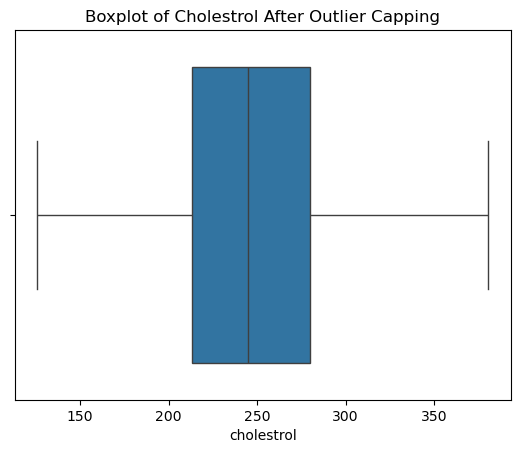

In [30]:
# Check the one feature after caping
print("Before capping:")
print(heart_data['cholestrol'].describe())
print("\nAfter capping:")
print(heart_data['cholestrol'].describe())

# Box plot
sns.boxplot(x=heart_data['cholestrol'])
plt.title("Boxplot of Cholestrol After Outlier Capping")
plt.show()

Observation: Check the single feature ('Cholestrol') outliers after capping, the outliers are minimized by using the capping.

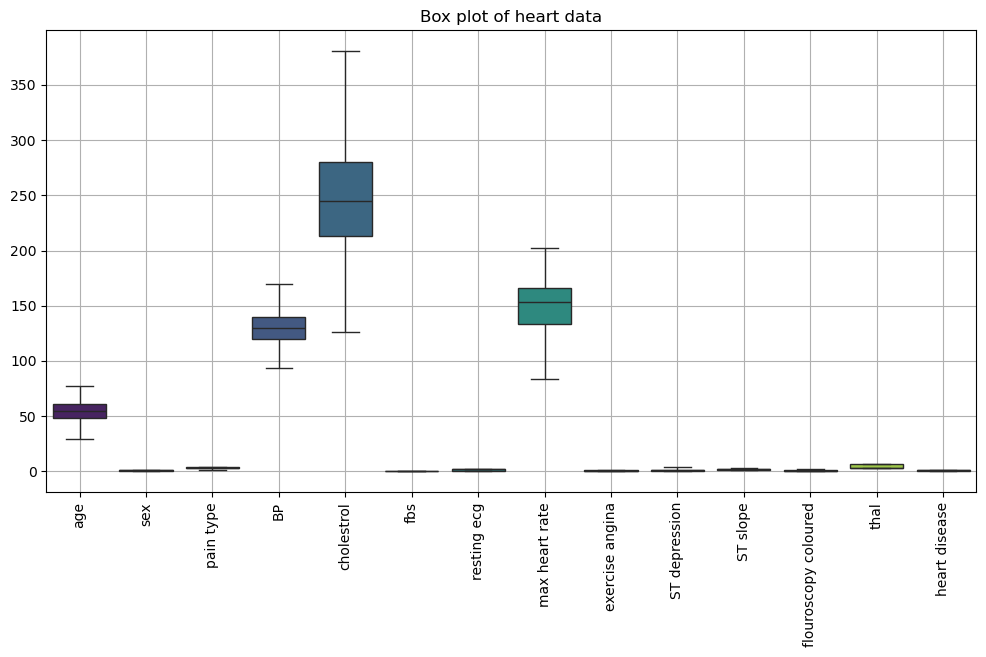

In [41]:
# Boxplot after capping of Heart Data
plt.figure(figsize=(12,6))
sns.boxplot(heart_data.select_dtypes(include=np.number),palette="viridis")
plt.xticks(rotation=90)
plt.title("Box plot of heart data")
plt.grid()
plt.show()

Observation: Heart dataset..
->'Cholestrol' has a wider ranges, as seen by the longer whiskers, indicating more variability in their data.
->'max heart rate' has a medium range, which could represent rare but significant values.
->Remaining features have smaller ranges, suggesting their values are tightly clustered.
Comparing Features: By plotting all features together, compare the ranges, distributions, and presence of outliers.

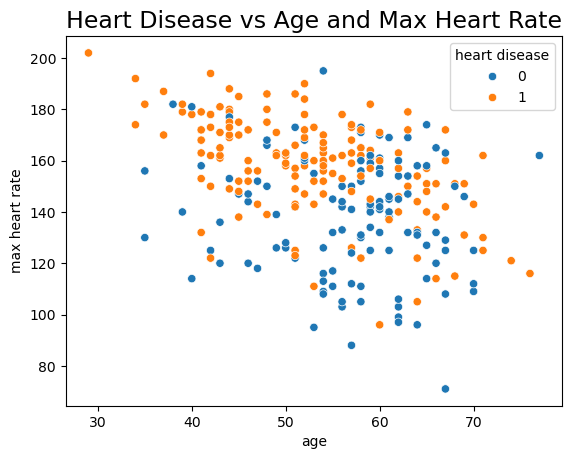

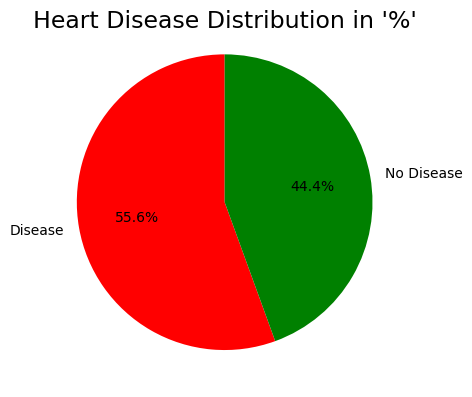

In [204]:
# Scatter plot of heart data
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=heart_data, x='age', y='max heart rate', hue='heart disease')
plt.title("Heart Disease vs Age and Max Heart Rate",fontsize=17)
plt.show()

# Pie chart of heart disease
heart_data['heart disease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Disease', 'No Disease'], colors=['red', 'green'])
plt.title("Heart Disease Distribution in '%'", fontsize=17, y=0.95)
plt.ylabel("")
plt.show()


Observation:    Heart data:-
--> The scatter plot the shows the max heart rate of a person has a heart disease or not  with respective to age of a person, The color dots shows the person is a heart patient or not.
--> The pie chart shows the distribution of heart disease in percentage, the 44.4% of members are noraml and 55.6% of members are heart disease patients.

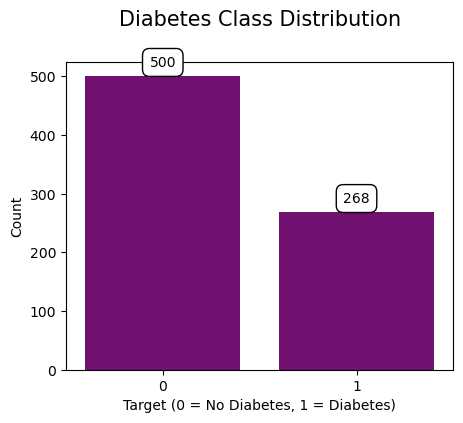

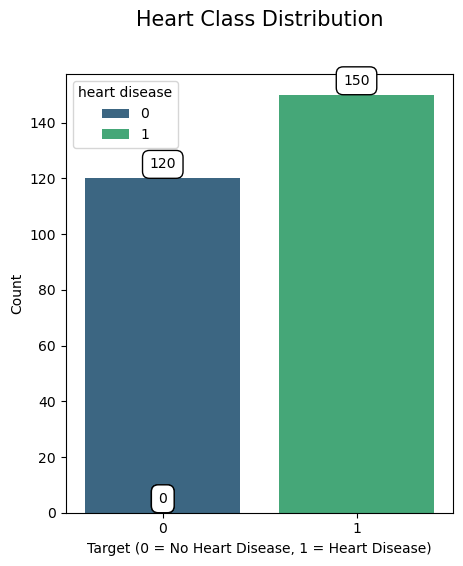

In [182]:
# Class Distrutions
import matplotlib.pyplot as plt
import seaborn as sns

# Diabetes class distribution
plt.figure(figsize=(5,4))
outcome=sns.countplot(x='Outcome', data=diabetes_data, color='purple')
for o in outcome.patches:
    count_value = int(o.get_height())
    outcome.annotate(f'{count_value}', 
                            (o.get_x() + o.get_width() / 2., o.get_height()), 
                            ha='center', va='bottom', fontsize=10, color='black', 
                            xytext=(0, 5), textcoords='offset points',
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')) 
plt.title("Diabetes Class Distribution",fontsize=15,x=0.5, y=1.09)
plt.xlabel("Target (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# Heart disease class distribution
plt.figure(figsize=(5,5.7))
disease=sns.countplot(x='heart disease', data=heart_data,  palette='viridis', hue='heart disease')
for d in disease.patches:
    count_value = int(d.get_height())
    disease.annotate(f'{count_value}', 
                            (d.get_x() + d.get_width() / 2., d.get_height()), 
                            ha='center', va='bottom', fontsize=10, color='black', 
                            xytext=(0, 5), textcoords='offset points',
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')) 
plt.title('Heart Class Distribution',fontsize=15,x=0.5, y=1.09)
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Count")
plt.show()

Observation: Diabetes Dataset--> The plot visuals shows the number of persons effected by diabetes, in this 0 represents the No diabetes and 1 represents the diabetes.

Heart Dataset--> The plot visuals shows the number of persons effected by diabetes, in this 0 represents the No heart disease and 1 represents the heart disease with count.

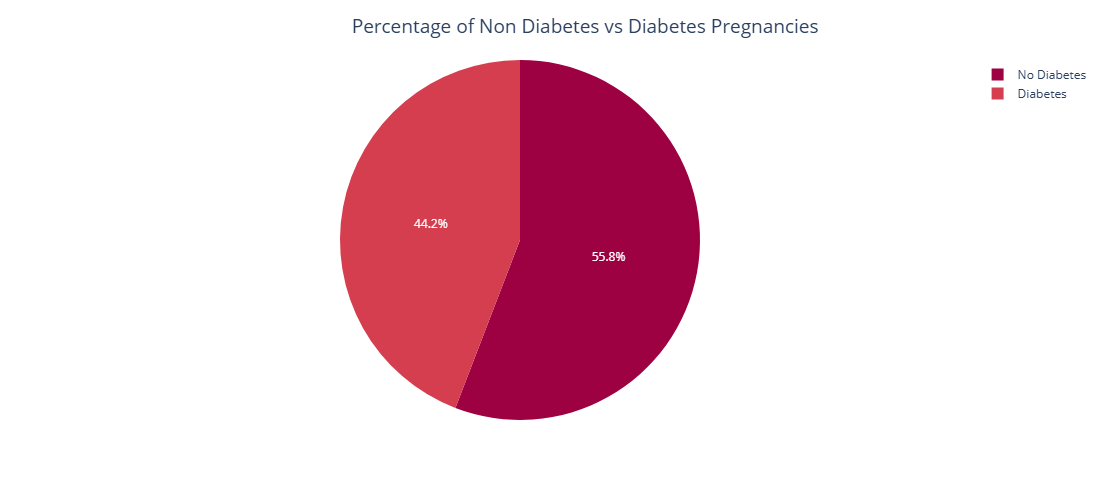

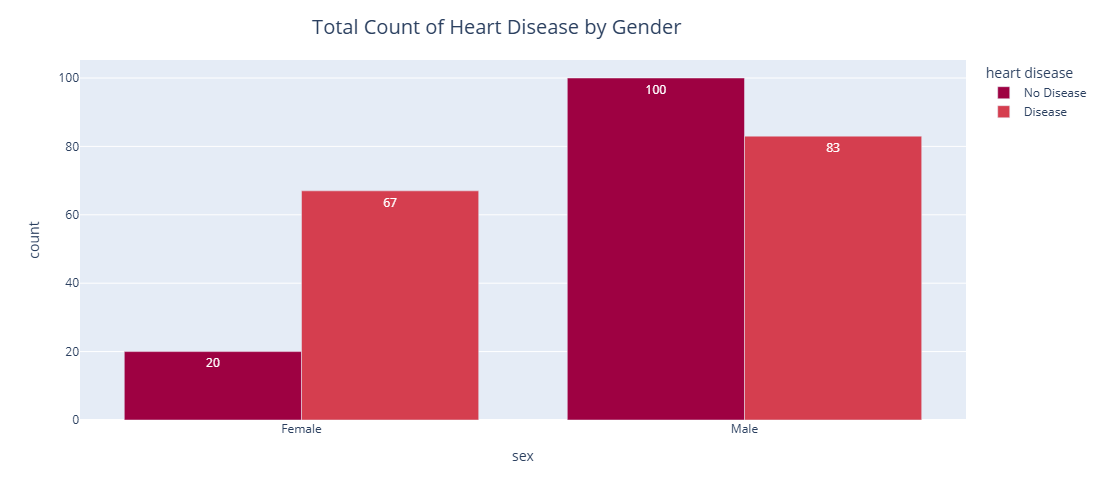

In [188]:
# Visualization of Diabetes data
# Create a copy of the data with mapped Outcome labels
diabetes_data_labeled = diabetes_data.copy()
diabetes_data_labeled["Outcome"] = diabetes_data_labeled["Outcome"].map({0: "No Diabetes", 1: "Diabetes"})
import plotly.express as px
fig = px.pie(diabetes_data_labeled, names="Outcome", values="Pregnancies",color_discrete_sequence=px.colors.diverging.Spectral)
fig.update_layout( title={'text': 'Percentage of Non Diabetes vs Diabetes Pregnancies', 'x': 0.53, 'y':.96,'font_size':19},
    width=500,
    height=500)
fig.show()


# Bar chart of heart data
import plotly.express as px
import pandas as pd
heart_data['sex'] = heart_data['sex'].replace({0: 'Female', 1: 'Male'})
# Group and count values
heart_counts = heart_data.groupby(['sex', 'heart disease']).size().reset_index(name='count')
heart_counts['heart disease'] = heart_counts['heart disease'].replace({0: 'No Disease', 1: 'Disease'})

# Plot bar chart with count labels
#  color='heart disease' create a color distinction for 0 and 1
fig = px.bar(heart_counts, x='sex', y='count', color='heart disease',text='count',barmode='group',color_discrete_sequence=px.colors.diverging.Spectral)
fig.update_layout(
    title={'text': 'Total Count of Heart Disease by Gender', 'x': 0.45, 'y': .96, 'font_size': 20},
    width=600,
    height=500
)
fig.show()


Observation:     Diabetes data:- 
--> The pie chart shows the percentage of diabetes and count of pregnanacies with diabetes. The 55.8% of pregnancies are diabetes and 44.2% of pregnancies are non diabetes. The total diabetes of pregnancies 1304 and non diabetes of pregnancies 1649.

Heart data:-
--> The bar chart shows the number of male and females are heart patients or not. The 67 females are heart patients and 20 females are normal, 83 males are heart patients and 100 male members are normal.

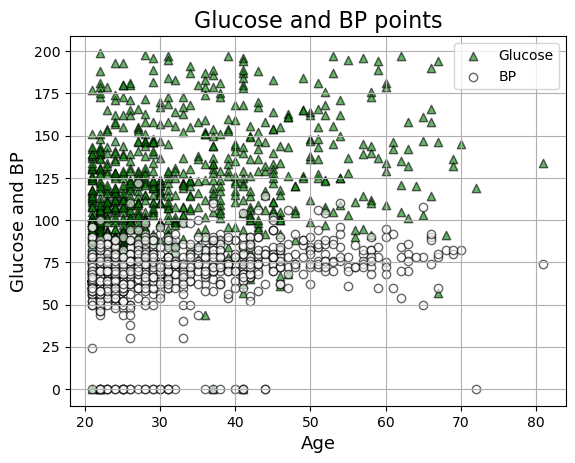

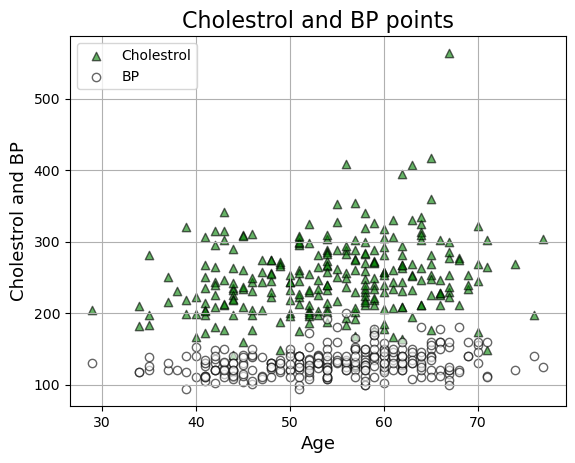

In [119]:
# Scatter plot of diabetes data
import matplotlib.pyplot as plt
plt.scatter(diabetes_data['Age'], diabetes_data["Glucose"], alpha=0.6, color = "green", label='Glucose',edgecolor='k',marker='^')
plt.scatter(diabetes_data['Age'], diabetes_data["BloodPressure"], alpha=0.6, color = "white", label='BP',edgecolor='k')
plt.title('Glucose and BP points', fontsize=16)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Glucose and BP', fontsize=13)
plt.legend()
plt.grid()
plt.show()

# Scatter plot of heart data
import matplotlib.pyplot as plt
plt.scatter(heart_data['age'], heart_data["cholestrol"], alpha=0.6, color = "green", label='Cholestrol',edgecolor='k',marker='^')
plt.scatter(heart_data['age'], heart_data["BP"], alpha=0.6, color = "white", label='BP',edgecolor='k')
plt.title('Cholestrol and BP points', fontsize=16)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Cholestrol and BP', fontsize=13)
plt.legend()
plt.grid()
plt.show()

Observation:                 Scatter plot:-
--> The scatter plot shows the glucose and BP levels of persons with respective to age in diabetes dataset.

--> The scatter plot shows the cholestrol and BP levels of persons with respective to afe in heart dataset.

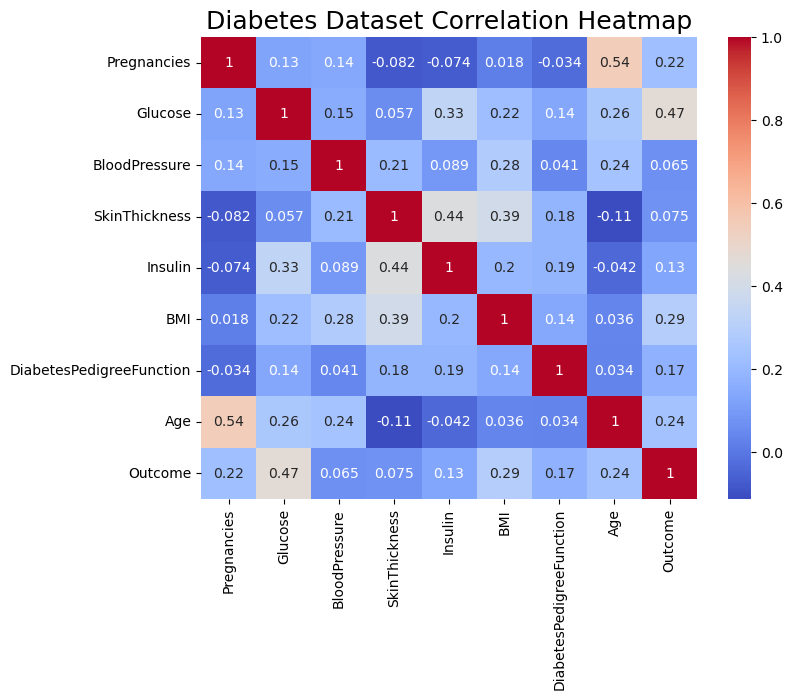

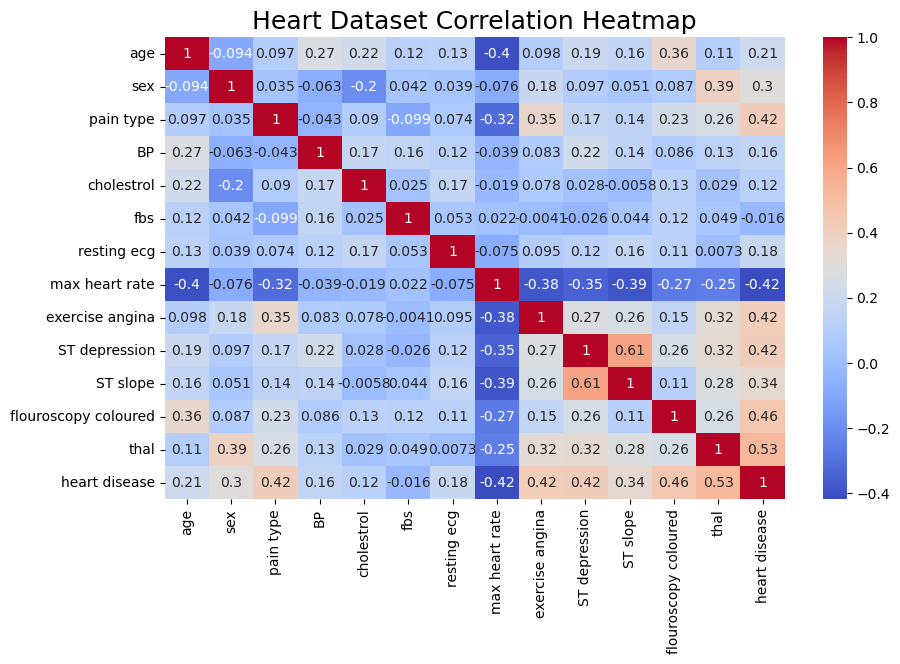

In [89]:
# Heatmap correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Diabetes data Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.title("Diabetes Dataset Correlation Heatmap",fontsize=18)
plt.show()

# Heart data heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', )
plt.title("Heart Dataset Correlation Heatmap", fontsize=18)
plt.show()

Observation: This heatmap shows the correlation between different health variables. Correlation values range from -1 to 1.
-> +1 (Red) → Perfect positive correlation (both variables increase together).
    +0.7 to +0.9 → Strong positive correlation.
    +0.4 to +0.6 → Moderate positive correlation.
    +0.1 to +0.3 → Weak positive correlation.
-> 0 (White/Light Blue) → No correlation (variables are independent).
-> -1 (Blue) →	Perfect negative correlation (one increases, the other decreases).
    -0.1 to -0.3 → Weak negative correlation.
    -0.4 to -0.6 → Moderate negative correlation.
    -0.7 to -0.9 → Strong negative correlation.

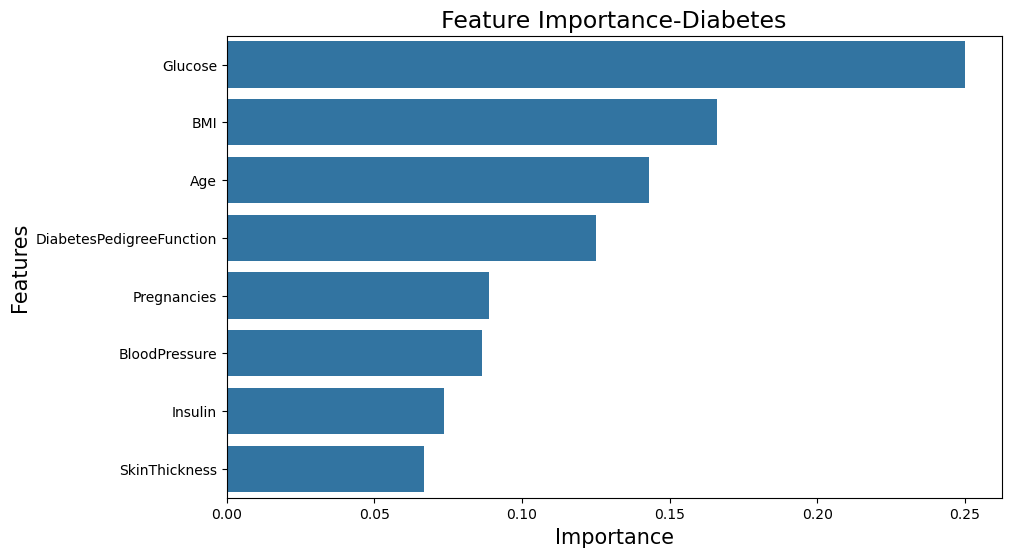

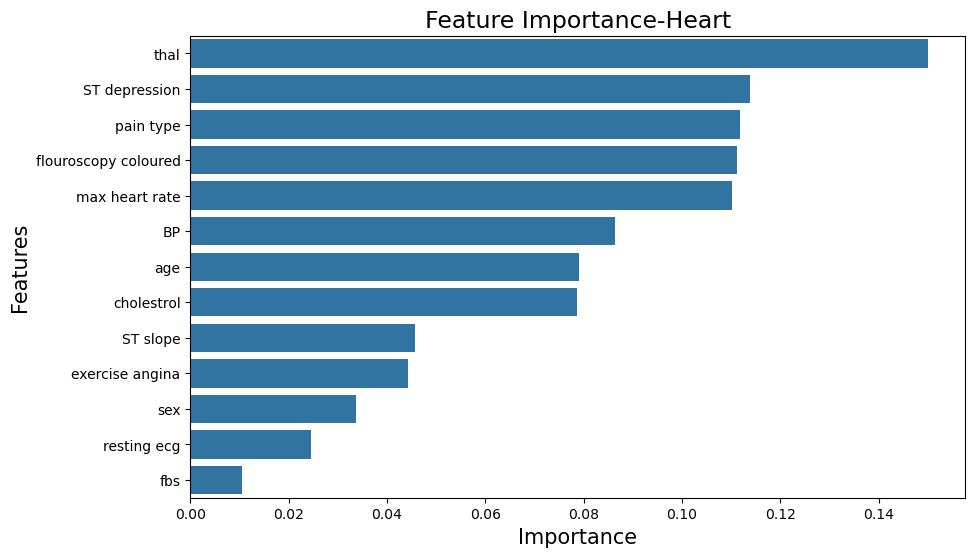

In [137]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Diabetes feature importance
x=diabetes_data.drop(columns=['Outcome'])
y=diabetes_data['Outcome']
rf=RandomForestClassifier()
rf.fit(x,y)
feature_importance=pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=feature_importance.index, x=feature_importance['Importance'])
plt.title('Feature Importance-Diabetes', fontsize=17)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.show()

# Heart disease feature importance
x=heart_data.drop(columns=['heart disease'])
y=heart_data['heart disease']
rf=RandomForestClassifier()
rf.fit(x,y)
feature_importance=pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=feature_importance.index, x=feature_importance['Importance'])
plt.title('Feature Importance-Heart', fontsize=17)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.show()

Observation:--> The feature importances gives the importance to the target variable.

In [7]:
# Random Forest Classifier
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Diabetes dataset (excluding target column 'Outcome')
X_diabetes = scaler.fit_transform(diabetes_data.drop(columns=['Outcome'], axis=1))
y_diabetes = diabetes_data['Outcome']

# Heart dataset (excluding target column 'heart disease')
X_heart = scaler.fit_transform(heart_data.drop('heart disease', axis=1))
y_heart = heart_data['heart disease'].replace(2,0)

from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
model.fit(X_train_d, y_train_d)
hmodel = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
hmodel.fit(X_train_h,y_train_h)

# Predict and evaluate
dpredict = model.predict(X_test_d)
hpredict = hmodel.predict(X_test_h)
print('===🩸 Diabetes Data===')
print("Accuracy on diabetes dataset:", accuracy_score(y_test_d, dpredict))
print('Confusion Matrix:\n',confusion_matrix(y_test_d, dpredict))
print('\nClassification reporton diabetes dataset:\n', classification_report(y_test_d, dpredict))
print('===🫀 Heart Data===')
print("Accuracy on heart dataset:", accuracy_score(y_test_h, hpredict))
print('Confusion Matrix:\n',confusion_matrix(y_test_h, hpredict))
print('\nClassification reporton heart dataset:\n', classification_report(y_test_h, hpredict))

===🩸 Diabetes Data===
Accuracy on diabetes dataset: 0.7662337662337663
Confusion Matrix:
 [[83 16]
 [20 35]]

Classification reporton diabetes dataset:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

===🫀 Heart Data===
Accuracy on heart dataset: 0.8518518518518519
Confusion Matrix:
 [[16  5]
 [ 3 30]]

Classification reporton heart dataset:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.86      0.91      0.88        33

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



Observation: Random Forest is an ensemble learning method that builds many decision trees and combines their results. It’s like asking multiple experts and taking a majority vote.
Diabetes Dataset --> the accuracy is 76% with confusion matrix and classification report.
Heart Dataset --> the accuracy is 85% with confusion matrix and classification report.

In [9]:
# Support Vector Classifier (SVC) model
from sklearn.svm import SVC

# Diabetes Dataset
# Train SVC model
svc_model_d= SVC(kernel='linear', random_state=42)  # or try 'rbf'
svc_model_d.fit(X_train_d, y_train_d)

# Predict and evaluate
y_pred = svc_model_d.predict(X_test_d)
print('===🩸 Diabetes Data===')
print("Accuracy:", accuracy_score(y_test_d, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_d, y_pred))
print("Classification Report:\n", classification_report(y_test_d, y_pred))

# Heart Dataset
# Train SVC model
svc_model_h = SVC(kernel='linear',random_state=42)  # or try 'rbf'
svc_model_h.fit(X_train_h, y_train_h)

# Predict and evaluate
y_pred = svc_model_h.predict(X_test_h)
print('===🫀 Heart Data===')
print("Accuracy:", accuracy_score(y_test_h, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_h, y_pred))
print("Classification Report:\n", classification_report(y_test_h, y_pred))

===🩸 Diabetes Data===
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[81 18]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

===🫀 Heart Data===
Accuracy: 0.8888888888888888
Confusion Matrix:
 [[17  4]
 [ 2 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.89      0.94      0.91        33

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Observation: SVC is a machine learning model that tries to find the best boundary (hyperplane) that separates classes.
Diabetes Dataset --> the accuracy is 75% with confusion matrix and classification report (e.g., diabetes or no diabetes).
Heart Dataset --> the accuracy is 88% with confusion matrix and classification report (e.g., heart disease or no disease).

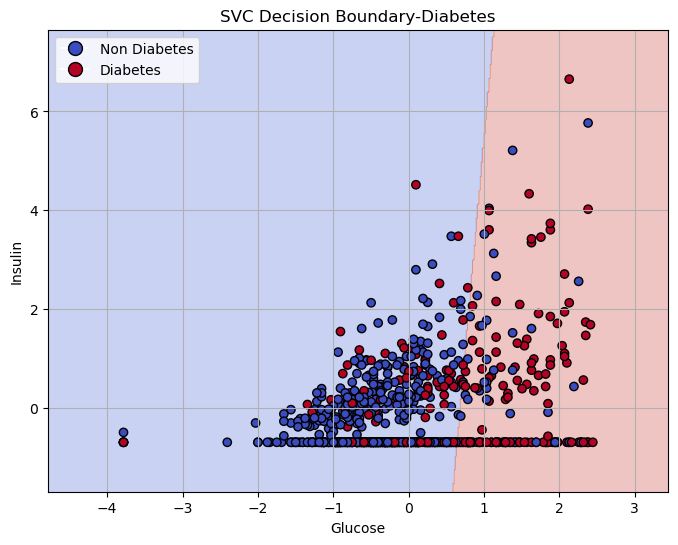

In [109]:
# SVC Decision Boundary of Diabetes data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Select two most relevant features (example: 'age' and 'cholesterol')
features = [ 'Glucose','Insulin']  # You can change these
X_vis = diabetes_data[features]
y_vis = diabetes_data['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# Train SVC (if not already trained)
svc_vis = SVC(kernel='linear', probability=True)
svc_vis.fit(X_scaled, y_vis)

# Plotting
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svc_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary and points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
# Add legend manually
handles = [
    plt.Line2D([], [], marker='o', color='w', label='Non Diabetes', markerfacecolor=plt.cm.coolwarm(0.0), markersize=10, markeredgecolor='k'),
    plt.Line2D([], [], marker='o', color='w', label='Diabetes', markerfacecolor=plt.cm.coolwarm(1.0), markersize=10, markeredgecolor='k')
]
# Label the plot
plt.legend(handles=handles)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('SVC Decision Boundary-Diabetes')
plt.grid(True)
plt.show()

Observation:   ---  Daiabetes data ---

The SVC decision boundary on a 2D feature space using:
--> X-axis: glucose.     
--> Y-axis: insulin.

The background color shows which class the SVC model predicts:
  🔵 Blue = Class 0 (Non diabetes).
  🔴 Red = Class 1 (Diabetes).
The line between the red and blue area = decision boundary.

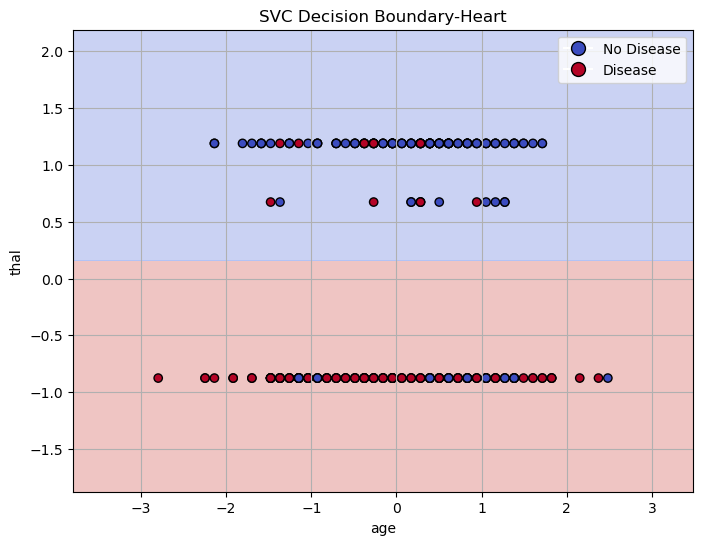

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Select two most relevant features (example: 'age' and 'cholesterol')
features = [ 'age','thal']  # You can change these
X_vis = heart_data[features]
y_vis = heart_data['heart disease']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# Train SVC (if not already trained)
svc_vis = SVC(kernel='linear', probability=True)
svc_vis.fit(X_scaled, y_vis)

# Plotting
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svc_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary and points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
# Add legend manually
handles = [
    plt.Line2D([], [], marker='o', color='w', label='No Disease', markerfacecolor=plt.cm.coolwarm(0.0), markersize=10, markeredgecolor='k'),
    plt.Line2D([], [], marker='o', color='w', label='Disease', markerfacecolor=plt.cm.coolwarm(1.0), markersize=10, markeredgecolor='k')
]
# Label the plot
plt.legend(handles=handles)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('SVC Decision Boundary-Heart')
plt.grid(True)
plt.show()


Observation:   ---  Heart data ---

The SVC decision boundary on a 2D feature space using:
--> X-axis: age.     
--> Y-axis: thal(thalassemia).

The background color shows which class the SVC model predicts:
🔵 Blue = Class 0 (No heart disease)
🔴 Red = Class 1 (Heart disease)
The line between the red and blue area = decision boundary.

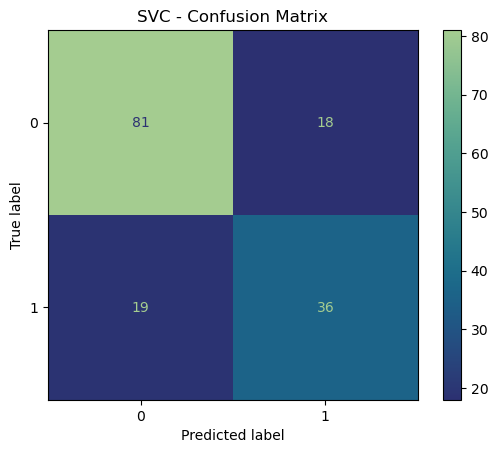

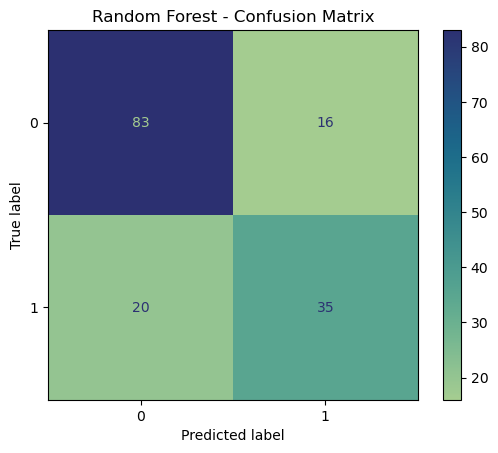

In [113]:
# Heat map of Diabetes (Random Forest and SVC)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# SVC diabetes heat map
# After prediction
ConfusionMatrixDisplay.from_estimator(svc_model_d, X_test_d, y_test_d, cmap='crest_r')
plt.title("SVC - Confusion Matrix")
plt.show()

# Random Forest diabetes heat map
ConfusionMatrixDisplay.from_estimator(model, X_test_d, y_test_d, cmap='crest')
plt.title("Random Forest - Confusion Matrix")
plt.show()


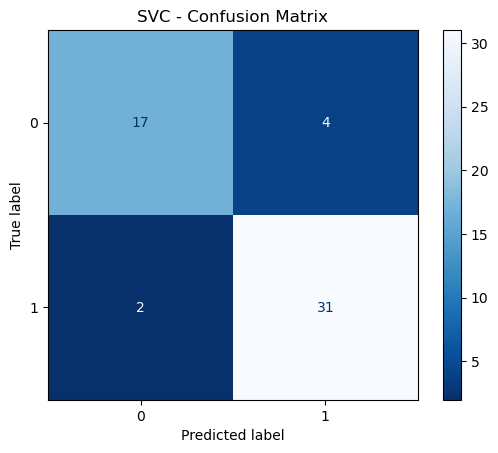

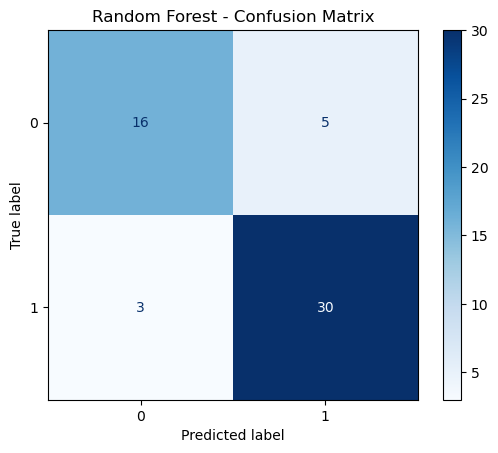

In [115]:
# Heat map of Heart Dissease (Random Forest and SVC)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# SVC heart disease heatmap
# After prediction
ConfusionMatrixDisplay.from_estimator(svc_model_h, X_test_h, y_test_h, cmap='Blues_r')
plt.title("SVC - Confusion Matrix")
plt.show()

# Random Forest heart disease heat map
ConfusionMatrixDisplay.from_estimator(hmodel, X_test_h, y_test_h, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [143]:
from sklearn.model_selection import cross_val_score
# Cross-validation to compare performance
rf_cv = cross_val_score(model, X_train_d, y_train_d, cv=5)
svc_cv = cross_val_score(svc_model_d, X_train_d, y_train_d, cv=5)

# Print cross-validation scores
print('===🩸 Diabetes Data===')
print(f"Random Forest Diabetes Cross-Validation Score: {rf_cv.mean():.4f}")
print(f"SVC diabetes Cross-Validation Score: {svc_cv.mean():.4f}")

# Train and test models
model.fit(X_train_d, y_train_d)
svc_model_d.fit(X_train_d, y_train_d)

rf_accuracy = model.score(X_test_d, y_test_d)
svc_accuracy = svc_model_d.score(X_test_d, y_test_d)

print(f"Random Forest Diabetes Accuracy: {rf_accuracy:.4f}")
print(f"SVC diabetes Accuracy: {svc_accuracy:.4f}")

===🩸 Diabetes Data===
Random Forest Diabetes Cross-Validation Score: 0.7687
SVC diabetes Cross-Validation Score: 0.7622
Random Forest Diabetes Accuracy: 0.7662
SVC diabetes Accuracy: 0.7597


Observation: The diabetes cross validation score of Random Forest is 76.87% and SVC is 76.22%, both models are give similar percentage with very low points difference.

In [129]:
from sklearn.model_selection import cross_val_score
# Cross-validation to compare performance
rf_cv = cross_val_score(hmodel, X_train_h, y_train_h, cv=5)
svc_cv = cross_val_score(svc_model_h, X_train_h, y_train_h, cv=5)

# Print cross-validation scores
print('===🫀 Heart Data===')
print(f"Random Forest Heart Cross-Validation Score: {rf_cv.mean():.4f}")
print(f"SVC Heart Cross-Validation Score: {svc_cv.mean():.4f}")

# Train and test models
hmodel.fit(X_train_h, y_train_h)
svc_model_h.fit(X_train_h, y_train_h)

rf_accuracy = hmodel.score(X_test_h, y_test_h)
svc_accuracy = svc_model_h.score(X_test_h, y_test_h)

print(f"Random Forest Heart Accuracy: {rf_accuracy:.4f}")
print(f"SVC Heart Accuracy: {svc_accuracy:.4f}")

===🫀 Heart Data===
Random Forest Heart Cross-Validation Score: 0.8198
SVC Heart Cross-Validation Score: 0.7920
Random Forest Heart Accuracy: 0.8519
SVC Heart Accuracy: 0.8889


Observation: The heart cross validation score of Random Forest is 81.98% and SVC is 79.20%, the random forest accuracy is 85.19% and SVC is 88.89% in heart disease.

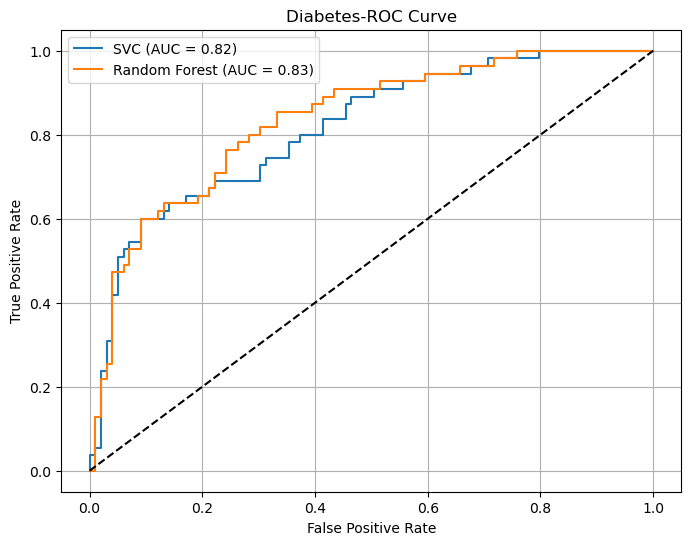

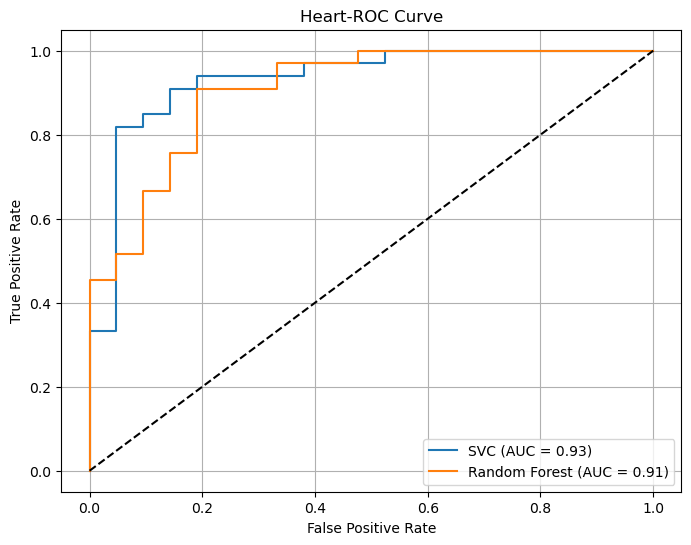

In [123]:
# ROC curve and AUC visualization
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Diabetes Dataset
# Get probabilities
svc_probs_d= svc_model_d.decision_function(X_test_d)
rf_probs_d = model.predict_proba(X_test_d)[:, 1]

# True and false positive rates
fpr_svc, tpr_svc, _ = roc_curve(y_test_d, svc_probs_d)
fpr_rf, tpr_rf, _ = roc_curve(y_test_d, rf_probs_d)

# AUC scores
auc_svc = auc(fpr_svc, tpr_svc)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_svc, tpr_svc, label=f"SVC (AUC = {auc_svc:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Diabetes-ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# Heart Dataset
# Get probabilities
svc_probs_h = svc_model_h.decision_function(X_test_h)
rf_probs_h = hmodel.predict_proba(X_test_h)[:, 1]

# True and false positive rates
fpr_svc, tpr_svc, _ = roc_curve(y_test_h, svc_probs_h)
fpr_rf, tpr_rf, _ = roc_curve(y_test_h, rf_probs_h)

# AUC scores
auc_svc = auc(fpr_svc, tpr_svc)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_svc, tpr_svc, label=f"SVC (AUC = {auc_svc:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Heart-ROC Curve")
plt.legend()
plt.grid(True)
plt.show()



Observation: Diabetes Data --> The graph shows the ROC curve with the AUC with SVC is 82% and Random Forest is 83%.

             Heart Data    --> The graph shows the ROC curve with the AUC with SVC is 93% and Random Forest is 91%
ROC Curve (Receiver Operating Characteristic Curve)
The ROC curve is a plot that shows the performance of a classification model at all possible classification thresholds.
X-axis: False Positive Rate (FPR)
Y-axis: True Positive Rate (TPR), also called Recall
It shows how well the model distinguishes between classes (e.g., disease vs. no disease) as the threshold changes.

AUC (Area Under the Curve)
The AUC is a single number that summarizes the ROC curve.
-->AUC = 1.0  Perfect classifier
-->AUC = 0.5  No better than random guessing
-->AUC < 0.5  Bad classifier
The higher the AUC, the better the model is at distinguishing between positive and negative classes.

In [83]:
diabetes_data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [85]:
heart_data.head(1)

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0


In [91]:
# Example input from user (new data)
input_diabetes = np.array([[2, 120, 70, 20, 79, 25.5, 0.4, 32]])            # 8 features
input_heart = np.array([[55, 1, 2, 140, 250, 0, 1, 150, 0, 1.2, 2, 0, 2]])  # 13 features

diabetes_scaler= StandardScaler()
heart_scaler= StandardScaler()
X_diabetes_scaled = diabetes_scaler.fit_transform(X_diabetes)
X_heart_scaled = heart_scaler.fit_transform(X_heart)

# Scale the inputs
input_diabetes_scaled = diabetes_scaler.transform(input_diabetes)
input_heart_scaled = heart_scaler.transform(input_heart)

# Predict
diabetes_result = model.predict(input_diabetes_scaled)
heart_result = hmodel.predict(input_heart_scaled)

print("🩸Diabetes Prediction:", "Diabetic" if diabetes_result[0] == 1 else "Non-Diabetic")
print("🫀Heart Disease Prediction:", "Heart Disease" if heart_result[0] == 1 else "No Heart Disease")

🩸Diabetes Prediction: Diabetic
🫀Heart Disease Prediction: No Heart Disease


In [145]:
# Advicing Predicting the disease from sample input features
import pandas as pd

# Sample Diabetes input (8 features)
diabetes_sample = pd.DataFrame([[
    6,      # Pregnancies
    148,    # Glucose
    72,     # BloodPressure
    35,     # SkinThickness
    0,      # Insulin
    33.6,   # BMI
    0.627,  # DiabetesPedigreeFunction
    50      # Age
]], columns=X_d.columns)

# Sample Heart input (13 features)
heart_sample = pd.DataFrame([[
    70, 1, 4, 130, 322, 0, 2, 109, 0, 2.4, 2, 3, 3
]], columns=X_h.columns)

# Predict probabilities 
diabetes_prob = model_d.predict_proba(diabetes_sample)[0][1]
heart_prob = model_h.predict_proba(heart_sample)[0][1]

# Diabetes Warning
print("===== DIABETES RISK WARNINGS =====")
print("\n🩸 Diabetes Risk Score:", round(diabetes_prob, 2))
if diabetes_prob >= 0.75:
    print("⚠️  High risk of diabetes detected! Immediate action recommended.")
elif diabetes_prob >= 0.5:
    print("⚠️  Near the risk boundary for diabetes. Monitor your diet and lifestyle.")
else:
    print("✅ Low risk of diabetes.")

# Heart Disease Warning
print("\n===== HEALTH RISK WARNINGS =====")
print("\n🫀 Heart Disease Risk Score:", round(heart_prob, 2))
if heart_prob >= 0.75:
    print("⚠️  High risk of heart disease detected! Consult your doctor.")
elif heart_prob >= 0.5:
    print("⚠️  Near the risk boundary for heart disease. Take precautions.")
else:
    print("✅ Low risk of heart disease.")


===== DIABETES RISK WARNINGS =====

🩸 Diabetes Risk Score: 0.84
⚠️  High risk of diabetes detected! Immediate action recommended.

===== HEALTH RISK WARNINGS =====

🫀 Heart Disease Risk Score: 0.9
⚠️  High risk of heart disease detected! Consult your doctor.
